## Simulation und Modellierung WS 17/18 Uebung 07 : 
### Methode der kleinsten quadratischen Abweichungen

### <u>Aufgabe 1</u>

Fuer die Koordinaten $(x,y)$ eines beliebiegen Kegelschnittes in der Ebene gilt

$$
        f(x,y) = A x^2 + B xy + C y^2 + D x + E y = 1
$$

Die Datei `orbit.dat` enthaelt eine Tabelle von $x$ und $y$ Werten, welche messfehlerbehaftete Punkte eines Kegelschnittes sind. 


- Laden Sie die Daten in ein `numpy` Array und finden Sie die Koeffizienten $A,B,C,D$ und $E$, welche die Summe der quadratischen Abweichungen ueber alle Messpunkte des Ausdrucks auf der linken Seite zur Zahl `1` minimiert.

Der Kegelschnitt ist eine geschlossene Kurve, wenn $B^2-4AC<0$ gilt, eine Parabel, wenn $B^2-4AC=0$ und ansonsten eine Hyperbel.

- Ist dieser Kegelschnitt eine offene oder geschlossene Kurve?
- Zeichnen Sie alle Kurven $y=y(x)$, die die Kegelschnittgleichung erfuellen zusammen mit den Datenpunkten in ein Diagram.

*Hinweis* : Sie koennen entweder Kegelschnittgleichung als quadratische Gleichung explizit nach $y$ aufloesen und beide Loesungen dort plotten, wo der Imaginaerteil gleich Null (oder sehr klein) ist, oder die matplotlib Funktion `mpl.contour(X,Y,f(X,Y),[1.0])` mit `X,Y = np.meshgrid(np.linspace(-2,2),np.linspace(-2,2))`, um die Hoehenlinie $f(X,Y)=1$ darzustellen.

*Zur Erinnerung* : Die Summe der quadratischen Abweichungen eines ueberbestimmten linearen Gleichungssystems

$$
    \mathrm{A}(\vec{x},\vec{y}) \vec{c} = \vec{b}
$$
wird durch die Loesung des kleineren linearen Gleichungssystems

$$
    \mathrm{A}^\top\mathrm{A} \vec{c} = \mathrm{A}^\top\vec{b}
$$
minimiert.

In [3]:
from pylab import *
%matplotlib inline

In [4]:
data=np.loadtxt('orbit.dat')
print(data.shape)

(200, 2)


In [5]:
np.array(data) #lade Daten in Numpy array

array([[-1.20857   ,  0.974792  ],
       [-1.2049    ,  0.976515  ],
       [-1.19696   ,  0.977973  ],
       [-1.18588   ,  0.980293  ],
       [-1.18044   ,  0.982202  ],
       [-1.17848   ,  0.981927  ],
       [-1.17476   ,  0.982631  ],
       [-1.16185   ,  0.987245  ],
       [-1.15288   ,  0.984763  ],
       [-1.15006   ,  0.986735  ],
       [-1.14931   ,  0.986688  ],
       [-1.14642   ,  0.990443  ],
       [-1.13974   ,  0.989017  ],
       [-1.13077   ,  0.992144  ],
       [-1.12616   ,  0.991462  ],
       [-1.12212   ,  0.992086  ],
       [-1.11123   ,  0.992223  ],
       [-1.09649   ,  0.993853  ],
       [-1.09655   ,  0.995136  ],
       [-1.08767   ,  0.995373  ],
       [-1.08287   ,  0.998548  ],
       [-1.07802   ,  0.995568  ],
       [-1.06465   ,  0.999314  ],
       [-1.06125   ,  0.998521  ],
       [-1.04732   ,  0.998509  ],
       [-1.03637   ,  0.998279  ],
       [-1.02375   ,  0.998976  ],
       [-1.01903   ,  0.999158  ],
       [-1.01568   ,

In [6]:
H = np.ones((200,5)) #erstellt 1er-Matrix mit 5 Spalten und 200 Zeilen 

J = np.ones((200,1)) #erstellt 1er-Vekor mit 200 Zeilen

G = np.array(data)  #definiere np.array(data) und x und y
x = G[:,0]
y = G[:,1]

for i in range (len(x)): #erstellt LGS
    H[i][0] = x[i]**2
    H[i][1] = x[i]*y[i]
    H[i][2] = y[i]**2
    H[i][3] = x[i]
    H[i][4] = y[i]
    
K = np.linalg.lstsq(H,J)[0] #löst LGS ########### soll mit ATA * c = AT * b loesen... 

A = K[0]
B = K[1]
C = K[2]
D = K[3]
E = K[4]

print(A, B, C, D, E)

[ 0.9827333] [ 0.95673125] [ 0.95861779] [ 1.00987493] [ 1.02591762]


In [7]:
def Kegelschnitt(A,B,C): #Wie sieht die Kurve des Kegelschnittes aus?
    Z = B**2-4*A*C
    if Z < 0:
        return "geschlossene Kurve"
    if Z == 0:
        return "offene Kurve"
    else :
        return "Hyperbel"

In [8]:
Kegelschnitt(A,B,C)

'geschlossene Kurve'

In [9]:
X,Y = np.meshgrid(np.linspace(-2,2),np.linspace(-2,2)) #Versuch nach Aufgabenstellung zu plotten
mpl.contour(X,Y,G,level = [1,0])
plot(G[:,0],G[:,1],"*")
############ hier nur die Daten geplotted nicht der Fit -10/50
show()

TypeError: 'module' object is not callable

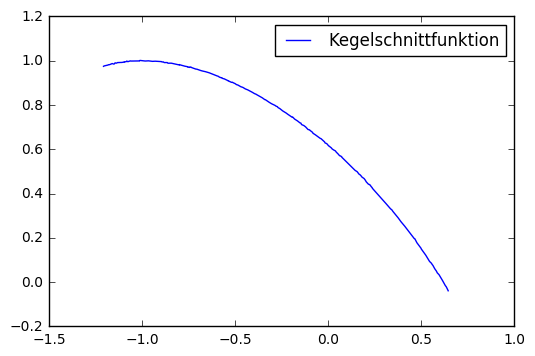

In [10]:
plot(G[0:200,0], G[0:200,1],'-',label="Kegelschnittfunktion") #Plotten der Funktion
legend()
show()

### <u>Zusatzaufgabe</u>

- Schreiben Sie eine Funktion `polyfit(x,y,N=0)`, welche fuer `L` Datenpunkte in den Feldern `x` und `y` die Koeffizienten `c` eines Polynoms 
$$
    y = p(x)= c_0 x^0 + c_1 x^1 + c_2 x^2 + \dots + c_N x^N
$$ 
`N`ten Grades findet, welches die Summe der quadratischen Abweichungen $\sum_l (p(x_l)-y_l)^2$ minimiert.
- Demonstrieren Sie die Funktion grafisch anhand von `L` $\gg$ `N` Punkten eines Polynoms, welche zufaellige Abweichungen in $x$ und $y$ Richtung aufweisen. *Hinweis* : `np.random.randn(N)` generiert ein Feld mit N standard normalverteilten Zufallszahlen)
- Finden Sie ein Polynom, welches die Daten der ersten Aufgabe gut beschreibt.